In [2]:
import numpy as np
from numpy.random import default_rng
import random
################################################################################
################################################################################
'''                       (0) GENERATE SYNTHETIC DATA                        '''
################################################################################
################################################################################

N_HT = 3 #5 # number of hashtags
N_CITY = 6 # number of cities (including countryside as city 0)
N_X = 3 # 3 variables

def generate_location_countryside(lb, ub, rng):
    # generate tweet location for the countryside
    x1 = rng.uniform(low=lb[0], high=ub[0])
    x2 = rng.uniform(low=lb[1], high=ub[1])
    X = np.array([x1, x2])
    return(X, rng)

def generate_location_city(mu, sigma, lb, ub, rng):
    # generate tweet location for a city
    # mu: mean locations (x1, x2)
    # sigma: standard deviation (s)
    X = np.array([])
    for ii in range(len(mu)):
        while True:
            x = mu[ii] + sigma * rng.standard_normal()
            if x >= lb[ii] and x <= ub[ii]:
                break
        X = np.append(X, x)
    return(X, rng)

def generate_time(mu_t, sigma_t, p_timeless, lb, ub, rng):
    # generate tweet time
    timeless = rng.choice([True, False], p=[p_timeless, 1-p_timeless])
    if timeless:
        # uniform sample
        t = rng.uniform(low=mu_t, high=ub)
    else:
        # normal sample
        while True:
            t = mu_t + sigma_t * rng.standard_normal()
            if t >= lb and t <= ub:
                break
    return(t, rng)

rng = default_rng()

lb = np.zeros(N_X)
ub = 100*np.ones(N_X)



# X, rng = generate_location_city(mu, sigma, lb, ub, rng)
# X, rng = generate_location_countryside(lb, ub, rng)
# t, rng = generate_time(mu_t, sigma_t, p_timeless, lb[2], ub[2], rng)

#                        Lattitude, longitude
CITY_CENTERS = np.array([[75, 30], #city 1
                         [20, 90], #city 2
                         [30, 20], #city 3
                         [25, 50], #city 4
                         [70, 80], #city 5
                         [95, 60]  #city 6
                        ])

CITY_RADII = np.array([15, 10, 8, 5, 5, 3])

CITY_PROB = CITY_RADII**1.5
# #                          city  1  2  3  4  5  6
# RELATIVE_POPULARITY = [np.array([9, 5, 5, 4, 6, 7]), # hashtag 1 (big city)
#                        np.array([6, 7, 7, 6, 5, 6]), # hashtag 2 (even, city)
#                        np.array([8, 2, 9, 5, 4, 5]), # hashtag 3 (south)
#                        np.array([2, 2, 5, 8, 8, 9]), # hashtag 4 (small)
#                        np.array([3, 4, 3, 3, 4, 5])  # hashtag 5 (countryside)
#                       ]
#
# COUNTRYSIDE_POPULARITY = [10, 2, 10, 10, 50]

#                          city  1  2  3  4  5  6
RELATIVE_POPULARITY = [np.array([9, 3, 2, 3, 1, 2]), # hashtag 1 (big city)
                       #np.array([5, 7, 7, 6, 5, 6]), # hashtag 2 (even, city)
                       #np.array([8, 2, 9, 5, 4, 5]), # hashtag 3 (south)
                       np.array([1, 1, 4, 8, 8, 9]), # hashtag 4 (small)
                       np.array([3, 4, 3, 3, 4, 5])  # hashtag 5 (countryside)
                      ]

# COUNTRYSIDE_POPULARITY = [5, 2, 10, 5, 75]
COUNTRYSIDE_POPULARITY = [10, 10, 75]

CITY_PROBABILITIES = []
for ii in range(N_HT):
    probs = RELATIVE_POPULARITY[ii] * CITY_PROB
    cside_prob = COUNTRYSIDE_POPULARITY[ii]/100.
    probs = probs/np.sum(probs) * (1-cside_prob)
    probs = np.append(probs, cside_prob)
    CITY_PROBABILITIES.append(probs)

#              hashtag  1,  2,  3,  4,  5
TIME_PEAKS = np.array([10, 30, 30])#, 60, 80])
TIME_SIGS  = np.array([25, 30, 10])#, 20, 30])*2
P_TIMELESS = np.array([.05, .05, .05])#, .05, .05])


# N_HT_INSTANCES = np.array([50, 100, 30, 80, 60])
N_HT_INSTANCES = np.array([1000, 900, 700])#, 800, 600])

HT_COLORS = ['slategray','tab:blue','darkred']#,'g','orange']

HT_NAMES = ['#pandemic', '#diplomacy', '#news']

TOPIC_NAMES = ['COVID','Geopolitics','Economy']
N_TOPICS = len(TOPIC_NAMES)

############################################################################
''' CREATE SYNTHETIC HASHTAG AND TOPIC DATA '''

# Layout:
# [ht_idx, x1, x2, x3]
SYNTHETIC_DATA = np.array([])

# for each hashtag
for ii in range(N_HT):
    mu_t = TIME_PEAKS[ii]
    sigma_t = TIME_SIGS[ii]
    p_timeless = P_TIMELESS[ii]
    # for each hashtag instance
    for jj in range(N_HT_INSTANCES[ii]):
        # select topic
        if ii==0: # if '#pandemic' then 'COVID'
            topic = 0
        elif ii==1: # if '#diplomacy' then 'Geopolitics'
            topic = 1
        elif ii==2: # if '#news' then any of 'COVID', 'Geopolitics', or 'Economy'
            topic = random.choice([0, 1, 2])
        else:
            ValueError('index for hashtag out of range')
        # select city
        timeless = rng.choice([True, False], p=[p_timeless, 1-p_timeless])
        city_idx = rng.choice(N_CITY+1, p=CITY_PROBABILITIES[ii])
        # generate location
        if city_idx == N_CITY:
            L, rng = generate_location_countryside(lb, ub, rng)
        else:
            mu = CITY_CENTERS[city_idx,:]
            sigma = CITY_RADII[city_idx]
            L, rng = generate_location_city(mu, sigma, lb, ub, rng)
        # generate time
        t, rng = generate_time(mu_t, sigma_t, p_timeless, lb[2], ub[2], rng)
        # append data
        X = np.append(L, t) # location and time
        X = np.append(topic, X) # topic
        X = np.append(ii, X) # hashtag

        if SYNTHETIC_DATA.size:
            SYNTHETIC_DATA = np.vstack([SYNTHETIC_DATA, X])
        else:
            SYNTHETIC_DATA = X

################################################################################
################################################################################
''' (2) Generate PDFs of Xs (lattitude, longitude, time) across all hashtags '''
'''
i.e., generate
P(x1,x2,x3|H1) =
P(x1,x2,x3|H2) =
etc.

Later, will use Bayes to back-calculate
P(H1|x1,x2,x3) = P(H1)*P(x1,x2,x3|H1)/P(x1,x2,x3)

'''

################################################################################
################################################################################

from sklearn.mixture import BayesianGaussianMixture
from scipy.stats import multivariate_normal

# gmm for each hashtag
hashtag_mixture_models = []
for ii in range(N_HT):
    bgm = BayesianGaussianMixture(n_components=N_CITY+2, n_init=10, max_iter = 200)
    bgm.fit(SYNTHETIC_DATA_HASHTAGS[ii])
    hashtag_mixture_models.append(bgm)

# gmm for each topic
topic_mixture_models = []
for ii in range(N_TOPICS):
    bgm = BayesianGaussianMixture(n_components=N_CITY+2, n_init=10, max_iter = 200)
    bgm.fit(SYNTHETIC_DATA_TOPICS[ii])
    topic_mixture_models.append(bgm)

def pdf_gaussian_mixture(bgm, x):
    # Calculate the probability density function of a gaussian mixture model
    # for point or points x
    weights = bgm.weights_
    means = bgm.means_
    cov = bgm.covariances_

    n_components = len(weights)

    pdf = 0.
    for jj in range(n_components):
        rv = multivariate_normal(means[jj], cov[jj])
        gauss_pdf = rv.pdf(x)
        pdf += weights[jj] * gauss_pdf

    return(pdf)


################################################################################
################################################################################
''' (3) Find probability of each hashtag given data '''
'''
i.e., calculate P(H1|x1,x2,x3)

Later, will use Bayes to back-calculate
P(H1|x1,x2,x3) = P(H1)*P(x1,x2,x3|H1)/P(x1,x2,x3)

P_ratio(H1|x1,x2,x3) = P(H1)*P(x1,x2,x3|H1)

'''
################################################################################
################################################################################


################################################################################
''' Get prior probabilites of each hashtag '''

# based on urn problem (how frequent observations have been):
P_prior_hashtags = (N_HT_INSTANCES + 1)/(np.sum(N_HT_INSTANCES)+N_HT)
print('probabilities sum: ', np.sum(P_prior_hashtags))

################################################################################
''' Get probabilites of each hashtag using Bayes '''

def hashtag_probabilities_bayes(x_predict):

    if len(x_predict.shape) == 1: # 1D array
        N_pred = 1
    else:
        N_pred = x_predict.shape[0]

    P_data_given_hts = np.zeros([N_pred, N_HT]) # Npredictions by Nhashtags
    for ii in range(len(hashtag_mixture_models)):
        bgm = hashtag_mixture_models[ii]
        pdf = pdf_gaussian_mixture(bgm, x_predict)
        P_data_given_hts[:,ii] = pdf

    P_ratio = P_prior_hashtags * P_data_given_hts # Npredictions by Nhashtags

    divisor = np.sum(P_ratio, 1)
    divisor = divisor.reshape([-1, 1])
    P_posterior = P_ratio / divisor # Npredictions by Nhashtags
    return(P_posterior)

# single point to predict at
x_predict = np.array([50, 50, 50])

P_posterior = hashtag_probabilities_bayes(x_predict)

print('P_posterior hashtag: ', P_posterior)

x1_plot = np.linspace(lb[0], ub[0], 65)
x2_plot = np.linspace(lb[1], ub[1], 65)

x1_plot, x2_plot = np.meshgrid(x1_plot, x2_plot)
x3 = (lb[2]+ub[2])/2 * np.ones([x1_plot.size, 1])

x_data = np.hstack((x1_plot.reshape([-1, 1]), x2_plot.reshape([-1, 1]), x3))

P_posteriors = hashtag_probabilities_bayes(x_data)



################################################################################
################################################################################
''' (4) Find probability of each topic given data '''
################################################################################
################################################################################

################################################################################
''' Get prior probabilites of each topic '''

# topic priors
topics = SYNTHETIC_DATA[:,0]
P_prior_topics = [np.sum(ii==topics)+1 for ii in range(N_TOPICS)]
P_prior_topics = np.array(P_prior_topics)
P_prior_topics = P_prior_topics/np.sum(P_prior_topics)


################################################################################
''' Get probabilites of each topic using Bayes '''


def topic_probabilities_bayes(x_predict):

    if len(x_predict.shape) == 1: # 1D array
        N_pred = 1
    else:
        N_pred = x_predict.shape[0]

    P_data_given_topics = np.zeros([N_pred, N_TOPICS]) # Npredictions by Nhashtags
    for ii in range(len(topic_mixture_models)):
        bgm = topic_mixture_models[ii]
        pdf = pdf_gaussian_mixture(bgm, x_predict)
        P_data_given_topics[:,ii] = pdf

    P_ratio = P_prior_topics * P_data_given_topics # Npredictions by Nhashtags

    divisor = np.sum(P_ratio, 1)
    divisor = divisor.reshape([-1, 1])
    P_posterior = P_ratio / divisor # Npredictions by Nhashtags
    return(P_posterior)

# single point to predict at
x_predict = np.array([50, 50, 50])

P_posterior = topic_probabilities_bayes(x_predict)

print('P_posterior topic: ', P_posterior)


################################################################################
''' Get entire surfaces for probabilites of each hashtag '''


x1_plot = np.linspace(lb[0], ub[0], 65)
x2_plot = np.linspace(lb[1], ub[1], 65)

x1_plot, x2_plot = np.meshgrid(x1_plot, x2_plot)
x3 = (lb[2]+ub[2])/2 * np.ones([x1_plot.size, 1])

x_data = np.hstack((x1_plot.reshape([-1, 1]), x2_plot.reshape([-1, 1]), x3))

P_posteriors = topic_probabilities_bayes(x_data)

################################################################################
''' plot all probability surfaces in 3D '''












#


probabilities sum:  1.0
P_posterior hashtag:  [[0.40830886 0.3213758  0.27031534]]
P_posterior topic:  [[0.25682495 0.32779106 0.41538399]]


' plot all probability surfaces in 3D '

[0.5882383241970844, 0.46299647288941354, 0.38943520012366406]
[0.2864966414886361, 0.22549862708275203, 0.18967121372986806]
[0.4423352642936479, 0.348157640837337, 0.2928420592233225]


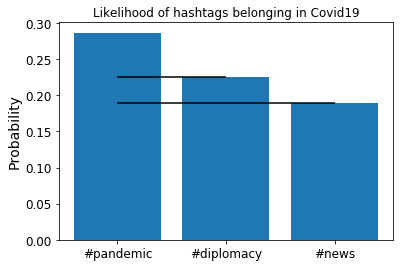

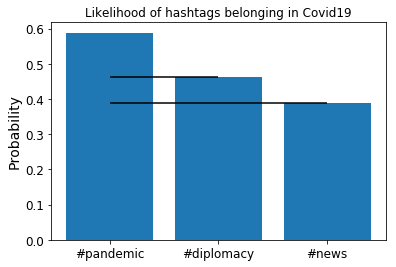

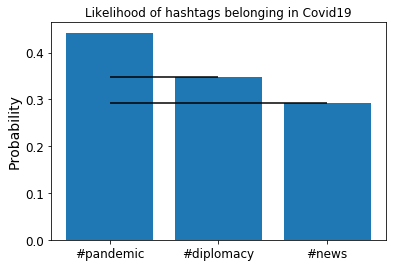

In [10]:
P_hashtag = [0.40830886, 0.3213758, 0.27031534]
P_topic = [0.25682495,0.32779106,0.41538399]

#A synthetic topic hashtag matrix is created. Lets say 120 tweets are there where they are categorized in the matrix down below.
# so for topic covid 19, the number of hashtags used respectively in those tweets are 14, 8 and 22. For geopolitics its 10,12,14 etc.

Matrix_Topic_Hashtag = [[14, 8, 22], 
                        [10, 12, 14], 
                        [13, 14, 13]]

#Likelihood of covidTopic given any hashtag: P(topic|hashtag) = P(topic ∩ hashtag)/P(hashtag)
# So, for P(covid19|pandemic) = no.of occurences of (covid19 ∩ pandemic) / total no. of occurences of pandemic
# That is (14/37) = 0.37
# Similarly calculate the others

Likelihoods_covidTopic = [0.37, 0.23, 0.45]
CovidwithHashtags  = []
GeoPoliticswithHashtags = []
NewswithHashtags = []

for i in range(0,len(P_hashtag)):
    x = (Likelihoods_covidTopic[0] * P_hashtag[i]) / P_topic[0]
    CovidwithHashtags.append(x)

print(CovidwithHashtags)

for i in range(0,len(P_hashtag)):
    x = (Likelihoods_covidTopic[1] * P_hashtag[i]) / P_topic[1]
    GeoPoliticswithHashtags.append(x)

print(GeoPoliticswithHashtags)
    
    
for i in range(0,len(P_hashtag)):
    x = (Likelihoods_covidTopic[2] * P_hashtag[i]) / P_topic[2]
    NewswithHashtags.append(x)

print(NewswithHashtags)


import matplotlib.pyplot as plt

x = ('#pandemic','#diplomacy', '#news')
y = GeoPoliticswithHashtags

plt.bar(x,y,align='center') # A bar chart
plt.xlabel('')
plt.ylabel('Probability')
plt.title('Likelihood of hashtags belonging in Covid19')
for i in range(len(y)):
    plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
plt.show()


x = ('#pandemic','#diplomacy', '#news')
y = CovidwithHashtags

plt.bar(x,y,align='center') # A bar chart
plt.xlabel('')
plt.ylabel('Probability')
plt.title('Likelihood of hashtags belonging in Covid19')
for i in range(len(y)):
    plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
plt.show()


x = ('#pandemic','#diplomacy', '#news')
y = NewswithHashtags

plt.bar(x,y,align='center') # A bar chart
plt.xlabel('')
plt.ylabel('Probability')
plt.title('Likelihood of hashtags belonging in Covid19')
for i in range(len(y)):
    plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
plt.show()
    